In [247]:
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import kagglehub
import joblib
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [248]:
df = pd.read_csv("car_prices.csv")
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [249]:
df = df.drop(columns = ["saledate"])
df = df.dropna(subset=['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice'])

label_encoders = {}
for column in ['make','model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'mmr']:
    label_encoders[column] = LabelEncoder()
    label_encoders[column] = LabelEncoder()
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(columns=["sellingprice"])
y = df["sellingprice"]

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  int64  
 2   model         472325 non-null  int64  
 3   trim          472325 non-null  int64  
 4   body          472325 non-null  int64  
 5   transmission  472325 non-null  int64  
 6   vin           472325 non-null  int64  
 7   state         472325 non-null  int64  
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  int64  
 11  interior      472325 non-null  int64  
 12  seller        472325 non-null  int64  
 13  mmr           472325 non-null  int64  
 14  sellingprice  472325 non-null  float64
dtypes: float64(3), int64(12)
memory usage: 57.7 MB


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)

print("Test R²:", r2_score(y_test, prediction))
print("Test MAE:", mean_absolute_error(y_test, prediction))
print(MSE/y_test.var())

Test R²: 0.8565917389028439
Test MAE: 2242.8192340900246
0.1434067429871567


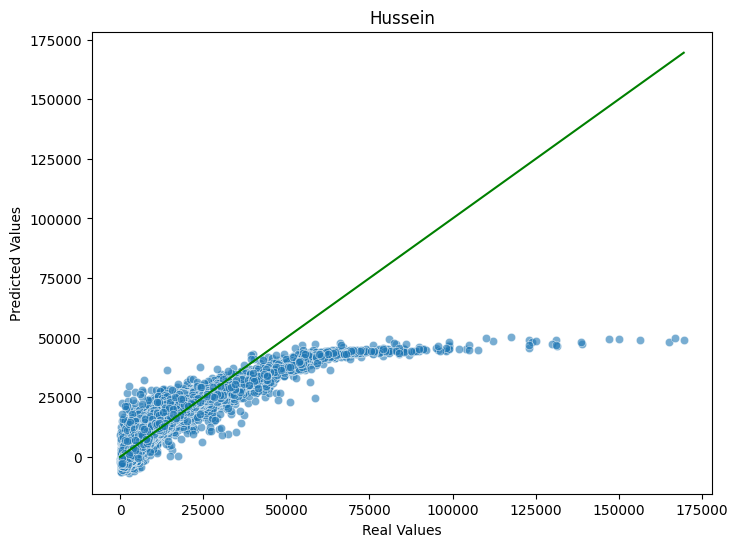

In [252]:
df_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': prediction
})

plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=df_plot, alpha=0.6)
sns.lineplot(x='Actual', y='Actual', data=df_plot, color='green')
plt.title('Estimation Plot')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()